<a href="https://colab.research.google.com/github/Jaybhatt216/2048/blob/master/NLP_Project_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Essentials
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re #########
from scipy.stats import multivariate_normal as mvn
# Tensor
import tensorflow as tf
import tensorflow_hub as hub

# NLTK
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk import pos_tag
nltk.download("stopwords")
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
X = pd.read_csv('/content/Ugly_Words_Cleaned.csv')

In [16]:
X.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512
0,0,-0.006094,0.065966,-0.046845,0.040648,-0.030130,-0.023790,0.056527,-0.065852,-0.047428,-0.056160,0.088488,-0.051742,0.019496,-0.002006,0.027364,-0.009147,-0.091029,-0.032635,0.002336,-0.032071,-0.042377,0.007383,0.015644,-0.042522,0.042829,0.007519,-0.027325,-0.045158,-0.021668,0.008290,0.023466,0.052940,-0.030344,0.029409,0.027079,0.006934,-0.064930,0.011496,-0.059324,...,0.024493,0.012440,-0.038833,0.036442,-0.030081,0.074626,0.045845,-0.047664,0.033448,-0.026130,-0.041222,0.014812,-0.041096,-0.025044,0.071706,-0.027785,0.043153,0.017411,-0.034988,0.010471,-0.005788,-0.003608,0.022213,0.076433,-0.079104,0.025912,-0.072889,0.075390,-0.028353,-0.046562,-0.001789,-0.012119,-0.087569,0.070395,0.041583,-0.024782,-0.018403,0.064336,0.023899,0
1,1,0.006361,0.025959,-0.027952,0.001518,-0.013413,-0.067714,-0.001843,0.091285,0.008502,-0.001199,0.046238,-0.084894,0.009045,-0.019875,0.016725,-0.056786,-0.089404,0.003482,-0.074631,0.092147,-0.011003,0.044720,-0.011596,0.014175,-0.025227,-0.032197,0.054663,-0.015005,0.017968,0.051361,0.005318,0.017381,0.048456,0.030366,-0.010908,0.023627,-0.025335,0.014164,-0.072274,...,-0.017617,0.051566,0.025877,-0.019085,0.018181,0.014180,-0.051931,0.072933,0.051571,0.008811,0.021542,0.056723,-0.036580,0.017011,0.053777,0.023837,0.065040,-0.011565,-0.046644,-0.080186,0.006143,-0.012163,0.057589,-0.021593,0.038647,-0.060047,-0.075744,0.004248,0.085780,0.009040,0.065440,0.043355,-0.042679,0.044132,-0.003048,-0.039173,0.022263,0.015416,-0.004290,0
2,2,0.048829,-0.060494,-0.011249,0.067714,0.031886,0.018584,0.017908,0.029567,0.043314,0.025356,0.039855,-0.068241,-0.033927,0.001750,-0.016082,-0.087752,-0.074289,-0.016032,-0.013859,0.041890,-0.025151,-0.050797,0.081614,0.005414,-0.008674,-0.042772,-0.050961,0.043938,-0.031682,-0.019450,-0.022859,0.022562,-0.049356,-0.063293,-0.060750,-0.034437,-0.011536,-0.042644,0.069053,...,0.023761,-0.024235,-0.072609,-0.047378,-0.011907,0.080831,0.004519,-0.062234,-0.001170,0.024669,-0.070842,0.017096,-0.033856,-0.030742,-0.042252,0.037881,0.074398,0.001571,0.006344,-0.010115,-0.025161,0.079277,0.038562,0.001469,-0.042112,-0.078997,-0.035002,-0.036753,-0.032487,-0.032209,0.060470,0.032786,-0.083513,0.050025,0.042526,-0.000471,-0.040855,0.000244,0.061038,0
3,3,-0.024284,0.035660,0.040260,-0.041432,0.037575,-0.044228,-0.043456,0.025993,0.045415,-0.009352,0.015814,-0.061261,-0.034509,0.009614,-0.087867,-0.042819,0.028624,0.004667,-0.060060,-0.016125,-0.071600,0.021748,-0.001089,0.054235,-0.058266,-0.080125,0.040128,0.052721,-0.024309,-0.080134,-0.084016,-0.010754,0.032563,0.011730,-0.062315,0.025751,-0.059691,-0.052057,-0.005240,...,0.022025,-0.044064,-0.047238,0.068293,-0.068364,0.073577,-0.074130,0.046873,0.059490,-0.012571,0.001885,-0.025272,0.004599,-0.019556,-0.009868,-0.087938,-0.009424,0.018898,0.047014,-0.029821,0.036958,-0.008463,-0.080246,0.016471,0.012518,0.050836,-0.047858,-0.057605,-0.041624,-0.039929,0.027021,0.059985,0.044810,0.021452,-0.053405,-0.074764,-0.003455,-0.055596,-0.027016,1
4,4,-0.065497,-0.028049,-0.026457,-0.027984,0.030934,-0.066535,-0.035914,-0.036650,0.044182,0.033349,0.107539,-0.048549,-0.021603,0.029933,0.038250,-0.072755,0.038196,0.021220,0.004549,-0.009129,-0.051661,0.009047,0.004510,0.008522,-0.074400,0.049719,0.028056,0.020028,-0.019425,0.046790,0.049753,0.014766,0.058855,0.001822,0.060028,0.064304,0.014638,-0.023256,-0.058496,...,-0.022632,-0.031790,0.080133,-0.084210,-0.058235,-0.000373,-0.037745,0.036185,0.016646,-0.000792,0.035372,0.050890,0.012551,-0.049534,0.032592,-0.051424,0.020990,0.007733,-0.015857,-0.054653,-0.009364,-0.011444,-0.005667,0.080311,0.017774,-0.015277,-0.008410,0.055033,-0.045128,-0.064190,0.019930,0.014888,-0.019798,0.014917,-0.029

In [17]:
X[X['512'] == 1].head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512
3,3,-0.024284,0.035660,0.040260,-0.041432,0.037575,-0.044228,-0.043456,0.025993,0.045415,-0.009352,0.015814,-0.061261,-0.034509,0.009614,-0.087867,-0.042819,0.028624,0.004667,-0.060060,-0.016125,-0.071600,0.021748,-0.001089,0.054235,-0.058266,-0.080125,0.040128,0.052721,-0.024309,-0.080134,-0.084016,-0.010754,0.032563,0.011730,-0.062315,0.025751,-0.059691,-0.052057,-0.005240,...,0.022025,-0.044064,-0.047238,0.068293,-0.068364,0.073577,-0.074130,0.046873,0.059490,-0.012571,0.001885,-0.025272,0.004599,-0.019556,-0.009868,-0.087938,-0.009424,0.018898,0.047014,-0.029821,0.036958,-0.008463,-0.080246,0.016471,0.012518,0.050836,-0.047858,-0.057605,-0.041624,-0.039929,0.027021,0.059985,0.044810,0.021452,-0.053405,-0.074764,-0.003455,-0.055596,-0.027016,1
4,4,-0.065497,-0.028049,-0.026457,-0.027984,0.030934,-0.066535,-0.035914,-0.036650,0.044182,0.033349,0.107539,-0.048549,-0.021603,0.029933,0.038250,-0.072755,0.038196,0.021220,0.004549,-0.009129,-0.051661,0.009047,0.004510,0.008522,-0.074400,0.049719,0.028056,0.020028,-0.019425,0.046790,0.049753,0.014766,0.058855,0.001822,0.060028,0.064304,0.014638,-0.023256,-0.058496,...,-0.022632,-0.031790,0.080133,-0.084210,-0.058235,-0.000373,-0.037745,0.036185,0.016646,-0.000792,0.035372,0.050890,0.012551,-0.049534,0.032592,-0.051424,0.020990,0.007733,-0.015857,-0.054653,-0.009364,-0.011444,-0.005667,0.080311,0.017774,-0.015277,-0.008410,0.055033,-0.045128,-0.064190,0.019930,0.014888,-0.019798,0.014917,-0.029231,0.010488,0.015578,0.054875,-0.041107,1
5,5,0.051513,0.008575,0.080549,0.034160,-0.003695,-0.002864,0.043221,0.054211,-0.040756,0.023802,-0.039009,-0.057390,0.007645,0.018903,0.036716,-0.056535,-0.015478,-0.053066,0.056116,-0.050963,-0.041234,-0.044032,-0.018533,-0.011356,-0.094614,-0.051442,0.068199,-0.014376,-0.034873,-0.050451,0.021778,0.002350,0.006238,0.058186,-0.037043,-0.015078,0.053105,-0.008292,-0.061899,...,-0.038128,0.022398,0.004066,0.051893,-0.001955,0.063292,-0.092259,0.010809,0.026445,0.030616,0.039533,-0.038774,-0.031954,0.008838,-0.071559,-0.001497,0.022959,0.032552,0.003250,0.062177,0.003960,-0.059049,0.029579,-0.007124,-0.023043,0.016424,-0.065301,-0.058856,-0.003582,-0.033256,0.042244,0.048572,0.048210,0.042730,0.009173,-0.019771,0.017167,-0.019115,0.000172,1
6,6,0.030290,0.005289,-0.038871,-0.057165,-0.003461,-0.048494,-0.056116,0.019271,0.044447,-0.068371,0.072601,-0.066333,-0.006311,0.018127,0.050166,-0.039559,0.021164,0.022904,0.030854,-0.011583,-0.061741,0.008536,-0.023774,-0.046695,0.069779,0.051350,-0.036109,-0.011914,-0.067039,-0.073152,-0.061810,-0.056281,-0.031072,-0.029276,-0.070257,-0.067911,0.065249,-0.054362,0.079396,...,0.035491,0.012220,-0.077159,0.008235,0.044492,-0.056654,-0.071834,0.026314,-0.025316,-0.012639,-0.029244,-0.013065,-0.014348,0.008877,0.029823,0.059635,-0.025868,-0.009706,0.042084,0.025902,0.022255,-0.060160,-0.065518,-0.025971,0.012572,0.009537,-0.000347,-0.008479,0.034621,-0.001215,0.038691,-0.011600,0.020640,-0.028235,0.078307,0.020074,0.004041,-0.018715,0.042687,1
9,9,0.017008,-0.003874,0.012466,-0.011067,0.083519,-0.046710,0.019996,-0.033918,-0.027930,-0.027493,0.077063,-0.073546,-0.046793,-0.034430,0.061214,-0.036010,0.060798,-0.071585,0.040198,-0.004911,-0.005069,-0.040952,0.066558,-0.005412,0.020600,-0.081628,0.086374,0.083301,-0.067157,-0.075998,0.040693,0.037566,-0.013881,0.005807,-0.000557,-0.078009,0.042423,-0.010636,-0.061315,...,0.043959,0.034579,0.016994,-0.061865,-0.080452,-0.005108,0.023210,0.042879,-0.019419,0.043169,0.048672,0.032374,-0.005915,-0.006099,-0.069593,0.048905,-0.020727,-0.029585,0.004169,0.024104,0.065184,-0.032983,-0.025884,0.004865,-0.014054,-0.037612,0.005788,0.027984,-0.037644,-0.020597,0.022503,-0.002023,-0.000840,-0.082198,

In [18]:
X[X['512'] == 0].head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512
0,0,-0.006094,0.065966,-0.046845,0.040648,-0.030130,-0.023790,0.056527,-0.065852,-0.047428,-0.056160,0.088488,-0.051742,0.019496,-0.002006,0.027364,-0.009147,-0.091029,-0.032635,0.002336,-0.032071,-0.042377,0.007383,0.015644,-0.042522,0.042829,0.007519,-0.027325,-0.045158,-0.021668,0.008290,0.023466,0.052940,-0.030344,0.029409,0.027079,0.006934,-0.064930,0.011496,-0.059324,...,0.024493,0.012440,-0.038833,0.036442,-0.030081,0.074626,0.045845,-0.047664,0.033448,-0.026130,-0.041222,0.014812,-0.041096,-0.025044,0.071706,-0.027785,0.043153,0.017411,-0.034988,0.010471,-0.005788,-0.003608,0.022213,0.076433,-0.079104,0.025912,-0.072889,0.075390,-0.028353,-0.046562,-0.001789,-0.012119,-0.087569,0.070395,0.041583,-0.024782,-0.018403,0.064336,0.023899,0
1,1,0.006361,0.025959,-0.027952,0.001518,-0.013413,-0.067714,-0.001843,0.091285,0.008502,-0.001199,0.046238,-0.084894,0.009045,-0.019875,0.016725,-0.056786,-0.089404,0.003482,-0.074631,0.092147,-0.011003,0.044720,-0.011596,0.014175,-0.025227,-0.032197,0.054663,-0.015005,0.017968,0.051361,0.005318,0.017381,0.048456,0.030366,-0.010908,0.023627,-0.025335,0.014164,-0.072274,...,-0.017617,0.051566,0.025877,-0.019085,0.018181,0.014180,-0.051931,0.072933,0.051571,0.008811,0.021542,0.056723,-0.036580,0.017011,0.053777,0.023837,0.065040,-0.011565,-0.046644,-0.080186,0.006143,-0.012163,0.057589,-0.021593,0.038647,-0.060047,-0.075744,0.004248,0.085780,0.009040,0.065440,0.043355,-0.042679,0.044132,-0.003048,-0.039173,0.022263,0.015416,-0.004290,0
2,2,0.048829,-0.060494,-0.011249,0.067714,0.031886,0.018584,0.017908,0.029567,0.043314,0.025356,0.039855,-0.068241,-0.033927,0.001750,-0.016082,-0.087752,-0.074289,-0.016032,-0.013859,0.041890,-0.025151,-0.050797,0.081614,0.005414,-0.008674,-0.042772,-0.050961,0.043938,-0.031682,-0.019450,-0.022859,0.022562,-0.049356,-0.063293,-0.060750,-0.034437,-0.011536,-0.042644,0.069053,...,0.023761,-0.024235,-0.072609,-0.047378,-0.011907,0.080831,0.004519,-0.062234,-0.001170,0.024669,-0.070842,0.017096,-0.033856,-0.030742,-0.042252,0.037881,0.074398,0.001571,0.006344,-0.010115,-0.025161,0.079277,0.038562,0.001469,-0.042112,-0.078997,-0.035002,-0.036753,-0.032487,-0.032209,0.060470,0.032786,-0.083513,0.050025,0.042526,-0.000471,-0.040855,0.000244,0.061038,0
7,7,-0.001262,-0.041795,-0.045298,-0.058104,-0.074906,-0.064285,-0.060353,0.025170,-0.007429,0.052020,0.074401,-0.072484,-0.044350,-0.066723,0.052688,-0.041397,-0.032323,0.024339,-0.067097,0.006104,-0.039153,-0.002294,0.071563,0.068788,-0.055673,0.038471,0.063424,-0.029641,-0.022569,-0.022722,0.016957,-0.064661,-0.011400,-0.041090,-0.045869,0.080084,-0.013699,-0.064110,-0.064466,...,0.004331,0.057290,-0.056308,-0.029315,-0.007917,0.063016,-0.013998,0.027021,0.041010,0.027007,0.003603,0.050393,-0.067132,0.014079,0.067675,0.007028,-0.000964,0.038835,-0.003456,-0.012159,0.007461,0.028992,0.037087,0.050454,0.004526,-0.048557,0.019984,0.060695,-0.009111,-0.025731,0.053610,0.032799,-0.000940,0.044544,-0.054550,0.001860,-0.021834,0.048626,-0.055561,0
8,8,-0.014198,-0.043730,-0.028171,0.006289,0.004547,0.001363,0.006595,0.005266,-0.004824,0.016941,0.075804,0.029707,-0.027696,-0.009370,0.073914,-0.019285,0.048562,-0.009023,-0.023698,0.027529,-0.068268,-0.015588,0.037339,0.043390,-0.066240,-0.057592,0.064154,-0.039401,-0.049520,-0.030611,0.060717,-0.025845,0.024309,0.087216,0.002614,0.001268,0.026422,0.056166,-0.054155,...,-0.033460,-0.002413,-0.059171,-0.074294,-0.048682,0.068887,-0.058765,0.004176,-0.055632,0.000215,-0.022490,0.057616,-0.073902,0.032644,0.083474,0.019539,0.086726,-0.012698,-0.029913,0.016268,0.015417,-0.045991,-0.021456,0.015542,-0.077730,0.045402,-0.068952,-0.000431,0.004981,0.074612,-0.008099,-0.013702,-0.007185,0.041008,-0.0330

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


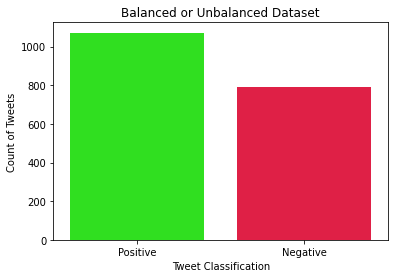

No of Tweets labelled as positive : 1072
No of Tweets labelled as negative : 791
Data is  unbalanced with only 42.46 % negative points and  57.54 % positive points


In [20]:
#checking balance

positive = X['512'].value_counts()[0]
negative = X['512'].value_counts()[1]

flatui = ["#15ff00", "#ff0033"]
sns.set_palette(flatui)
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Balanced or Unbalanced Dataset')
plt.show()

print('No of Tweets labelled as positive :',positive)
print('No of Tweets labelled as negative :',negative)

print('Data is  unbalanced with only',round(((negative/(negative+positive))*100),2),'% negative points and ',
      round(((positive/(negative+positive))*100),2),'% positive points')

In [44]:
tweets = X.to_numpy()

In [45]:
tweets[1]

array([ 1.00000000e+00,  6.36114553e-03,  2.59588901e-02, -2.79517621e-02,
        1.51837419e-03, -1.34127233e-02, -6.77144304e-02, -1.84280099e-03,
        9.12850574e-02,  8.50219186e-03, -1.19943754e-03,  4.62378673e-02,
       -8.48940536e-02,  9.04514547e-03, -1.98745728e-02,  1.67253260e-02,
       -5.67860007e-02, -8.94042552e-02,  3.48152802e-03, -7.46307597e-02,
        9.21472386e-02, -1.10034747e-02,  4.47196029e-02, -1.15955854e-02,
        1.41751505e-02, -2.52273027e-02, -3.21970768e-02,  5.46625294e-02,
       -1.50053585e-02,  1.79679487e-02,  5.13611883e-02,  5.31762000e-03,
        1.73813179e-02,  4.84562293e-02,  3.03658079e-02, -1.09079285e-02,
        2.36273818e-02, -2.53354888e-02,  1.41641283e-02, -7.22735375e-02,
       -1.52954077e-02,  8.53793174e-02,  1.45900808e-03, -5.84822781e-02,
       -6.91391379e-02,  2.46318728e-02, -7.80565813e-02, -4.29364911e-04,
       -3.25180218e-02,  3.22889537e-02,  1.34172561e-02, -5.15936576e-02,
       -8.46048594e-02,  

In [46]:
def Distance(x,means,*args,**kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = x - mean
    dist =(np.sum(diff**2,axis=1,keepdims=True))
    dists.append(dist)
  
  
  return np.hstack(dists)

In [47]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff = []
  responsibilities = []

  for mean in means:
    diff= X - mean
    dist =  (np.sum(diff **2,axis=1, keepdims=True   ))
    numerator = np.exp(-beta*dist)
    denominator = np.sum(numerator)

    responsibility = -numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [48]:
class K_means:
  def __init__(self ,k, distance_func = Distance, beta=None):

    self.k = k
    self.distance_func = distance_func
    self.beta = beta
  
  def Fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means = []
      for j in range(self.k):
        mean = np.mean(X[y_hat==j],axis=0)
        self.means.append(mean)
      self.means = np.vstack(self.means)

    y_hat = self.Predict(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat             )
    plt.scatter(self.means[:,0],self.means[:,1],c="r",s=10                      )


    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='r',s=15)
    return y_hat

  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta )
    y_hat = np.argmin(dist,axis=1  )
    return y_hat


In [54]:
tweet_analysis = K_means(k=6)

In [55]:
tweets2 = np.vstack(tweets)

In [56]:
tweets2

array([[ 0.00000000e+00, -6.09447993e-03,  6.59660399e-02, ...,
         6.43358007e-02,  2.38987990e-02,  0.00000000e+00],
       [ 1.00000000e+00,  6.36114553e-03,  2.59588901e-02, ...,
         1.54160121e-02, -4.29026177e-03,  0.00000000e+00],
       [ 2.00000000e+00,  4.88294773e-02, -6.04937859e-02, ...,
         2.43939852e-04,  6.10376522e-02,  0.00000000e+00],
       ...,
       [ 1.86000000e+03, -4.87323701e-02, -7.96602964e-02, ...,
        -7.63512477e-02,  5.29376930e-03,  1.00000000e+00],
       [ 1.86100000e+03,  2.91348551e-04,  6.86026141e-02, ...,
        -3.49411112e-03, -7.28787705e-02,  0.00000000e+00],
       [ 1.86200000e+03,  3.90411378e-03, -1.00928992e-02, ...,
        -6.49184585e-02,  8.47921986e-03,  0.00000000e+00]])

array([0, 0, 0, ..., 1, 1, 1])

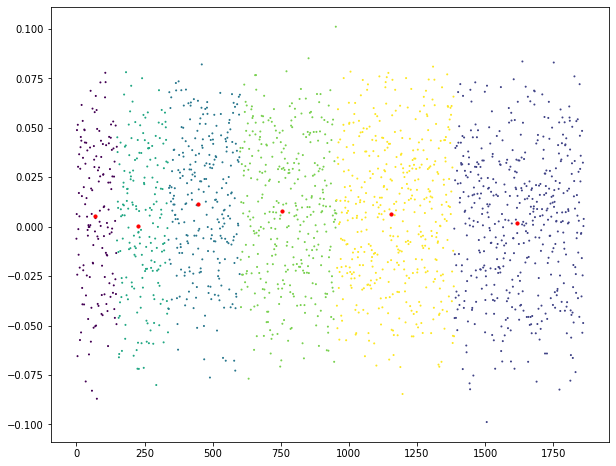

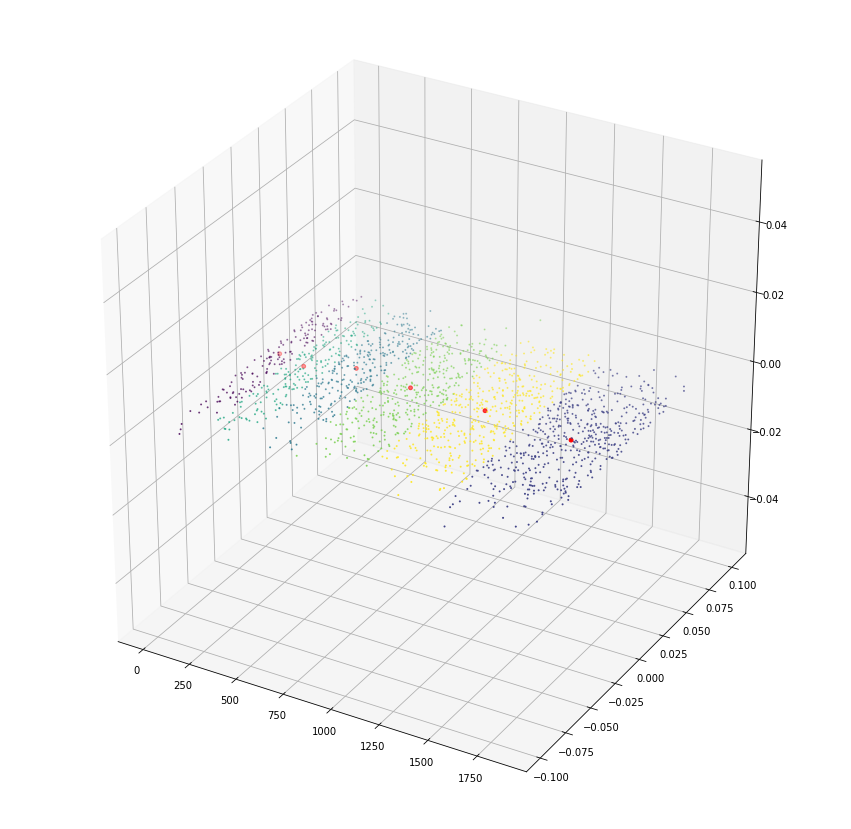

In [57]:
tweet_analysis.Fit(tweets2)

In [63]:
y_hat = tweet_analysis.Predict(tweets2)